In [39]:
import pickle
with open("data_splits.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

### Sanity check

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

#  Generate synthetic dataset
np.random.seed(42)
N = 5000
x = np.random.uniform(0, 10, N)
A = np.random.uniform(0.5, 2.0, N)
B = np.random.uniform(0.5, 3.0, N)
C = np.random.uniform(0.5, 2.0, N)
D = np.random.uniform(0.5, 3.0, N)

y = A * np.sin(B * x) + C * np.cos(D * x)

# Stack features (x, A, B, C, D) into a feature matrix
X = np.stack([x, A, B, C, D], axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressions

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, tolerance=0.1):
    '''
    Function to evaluate the model performance.
    
    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)
        
    Output:
        Prints Mean Squared Error, R-squared and mseuracy metrics.
    '''
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = np.mean(np.abs(y_true - y_pred) < tolerance)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Accuracy (within tolerance {tolerance}): {accuracy * 100:.2f}%")


def visualize_predictions(y_true, y_pred):
    ''' 
    Function to visualize the predictions of the model.

    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)

    Output:
        Two plots: Residual plot and Prediction vs Actual plot
    '''    
    # Residual Plot
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Drug Response')
    plt.show()

#### Ridge Regression

      Drug_Response
1513       0.276706
216        0.751731
5879       0.193245
5169       0.760038
421        0.342367
...             ...
5226       0.961822
5390       0.286874
860        0.568764
7603       0.460677
7270       0.062184

[6114 rows x 1 columns] [[0.50374077]
 [0.45300751]
 [0.53852165]
 ...
 [0.51284313]
 [0.51264541]
 [0.48851334]]
      Drug_Response
7503       0.819541
7478       0.444424
2462       0.888690
4507       0.556280
2973       0.419219
...             ...
2543       0.706724
5993       0.565485
1192       0.384553
5440       0.423204
7358       0.034202

[1529 rows x 1 columns] [[0.50254861]
 [0.49786059]
 [0.5156964 ]
 ...
 [0.44393614]
 [0.47416469]
 [0.51024851]]
Training Data Evaluation:
Mean Squared Error: 0.07935632570376042
R-squared: 0.015138825904808528
Accuracy (within tolerance 0.1): 20.22%
Testing Data Evaluation:
Mean Squared Error: 0.08299492989815206
R-squared: -0.019161653050880023
Accuracy (within tolerance 0.1): 19.88%
Testing Data V

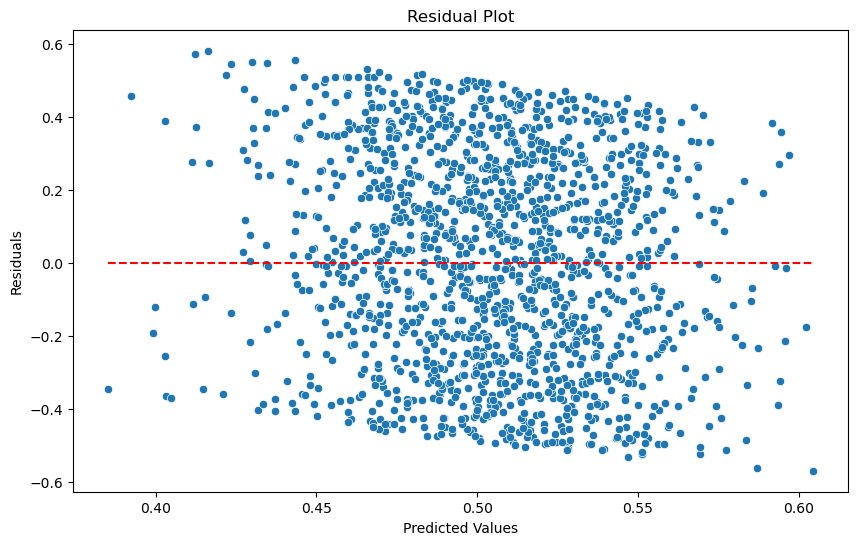

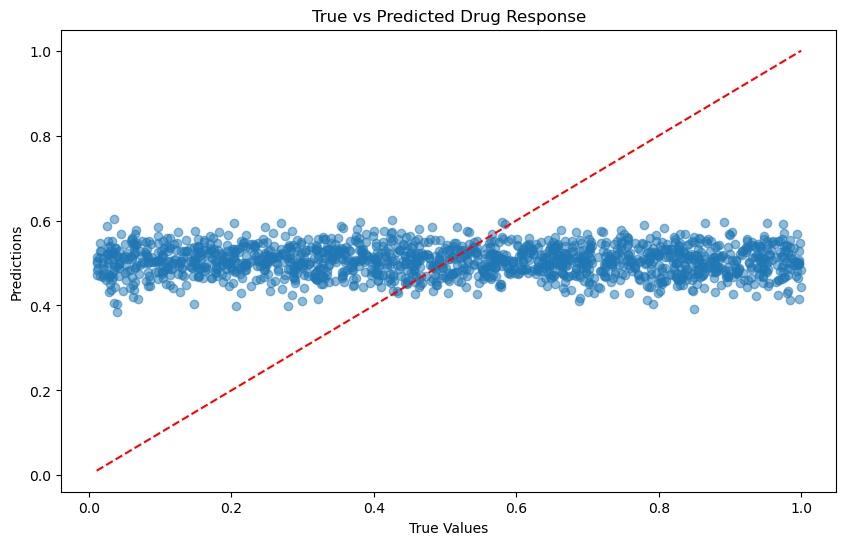

In [30]:
from sklearn.linear_model import Ridge 

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
print(y_train, y_pred_train)
print(y_test, y_pred_test)

# Evaluate the model on the training and test data
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

# Visualize the predictions
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

Ridge regression does very poorly on the dataset, and this independently of the alpha choice. This is probably because it is a non linear relationship. Let's try Random Forest.

#### Random Forest

C:\Users\alice\AppData\Local\Temp\ipykernel_30176\2497020516.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Training Data Evaluation:
Mean Squared Error: 0.13826339803284055
R-squared: 0.8614383855616753
Accuracy (within tolerance 0.2): 31.32%
Testing Data Evaluation:
Mean Squared Error: 1.0185190621896625
R-squared: -0.009957077243538226
Accuracy (within tolerance 0.2): 11.45%
Training Data Visualization:


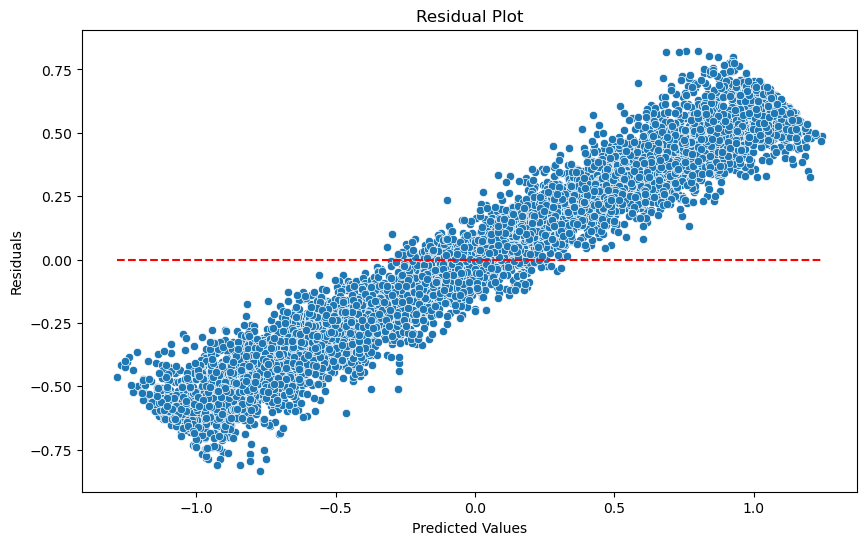

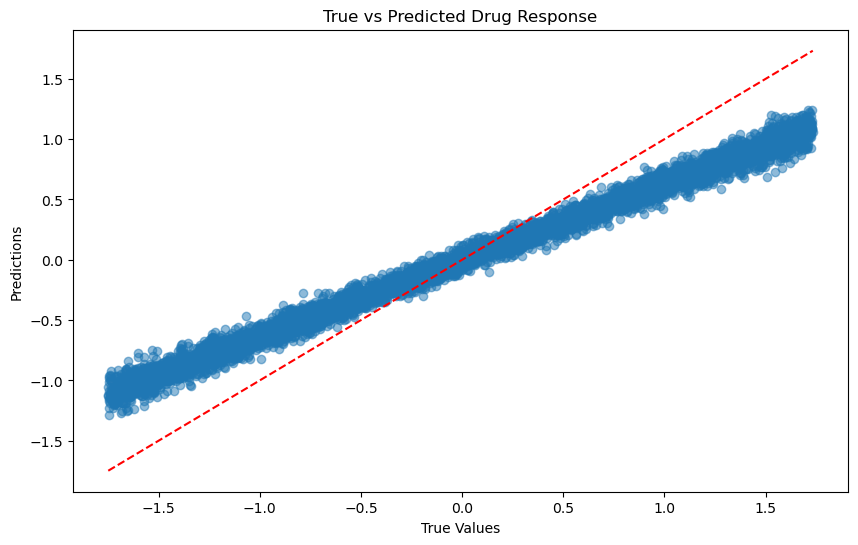

Testing Data Visualization:


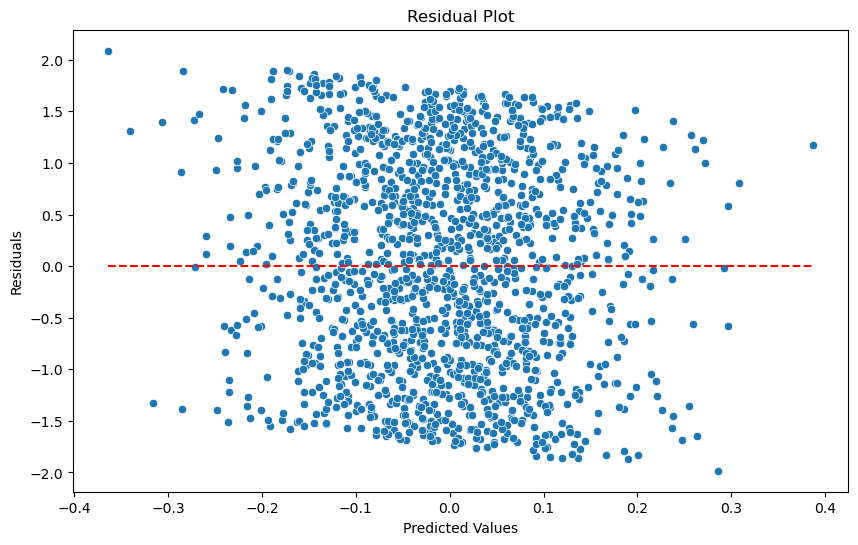

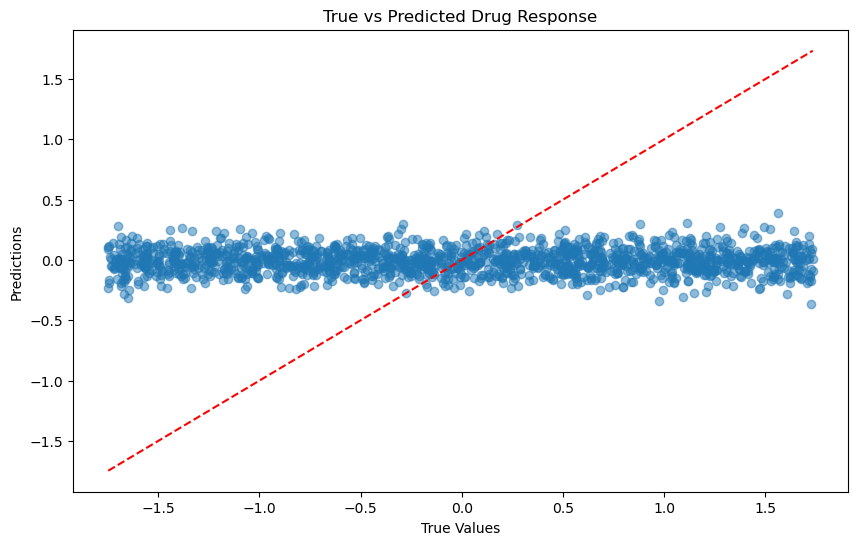

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(np.array(y_train).flatten(), y_pred_train, tolerance=0.2)
print("Testing Data Evaluation:")
evaluate_model(np.array(y_test).flatten(), y_pred_test, tolerance=0.2)

# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(np.array(y_train).flatten(), np.array(y_pred_train).flatten())
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

C:\Users\alice\AppData\Local\Temp\ipykernel_30176\2921332674.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Training Data Evaluation:
Mean Squared Error: 0.011004695673546231
R-squared: 0.863424907775242
Accuracy (within tolerance 0.2): 99.74%
Testing Data Evaluation:
Mean Squared Error: 0.08208334929418648
R-squared: -0.007967619916967372
Accuracy (within tolerance 0.2): 41.27%
Training Data Visualization:


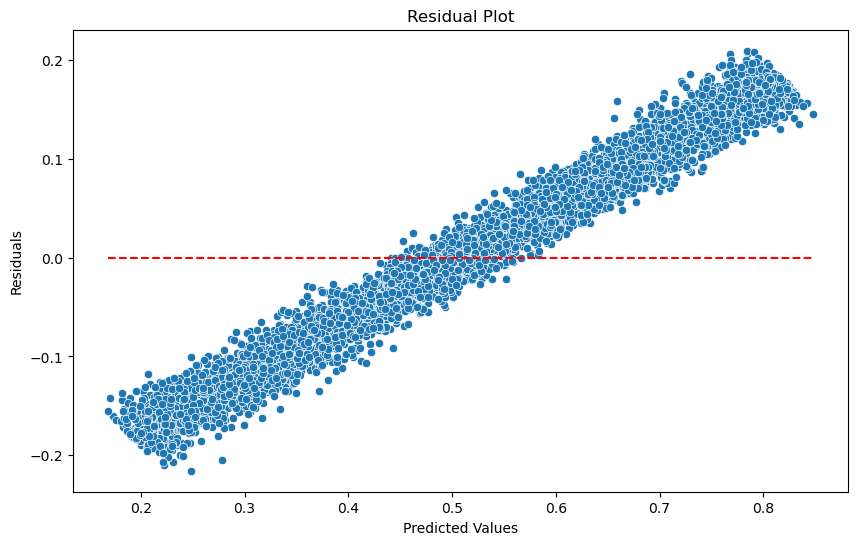

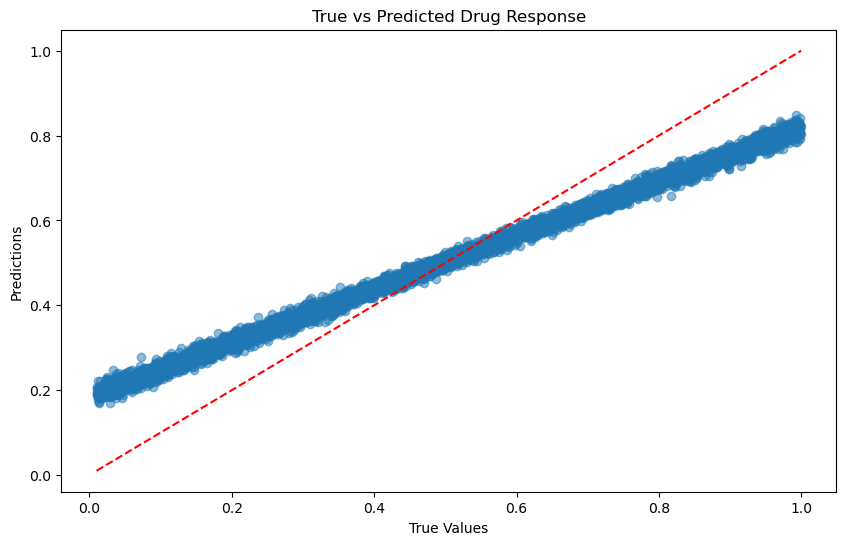

Testing Data Visualization:


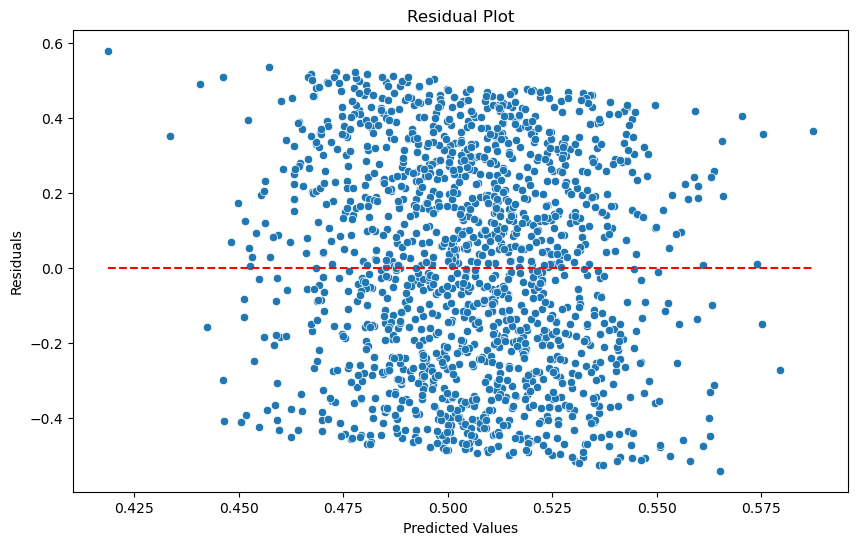

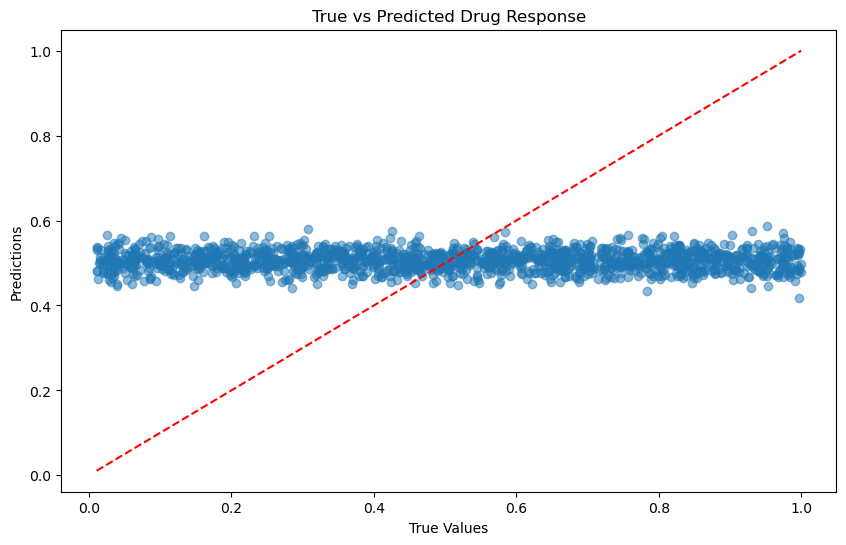

In [4]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(np.array(y_train).flatten(), y_pred_train, tolerance=0.2)
print("Testing Data Evaluation:")
evaluate_model(np.array(y_test).flatten(), y_pred_test, tolerance=0.2)

# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(np.array(y_train).flatten(), np.array(y_pred_train).flatten())
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

Training Data Visualization:


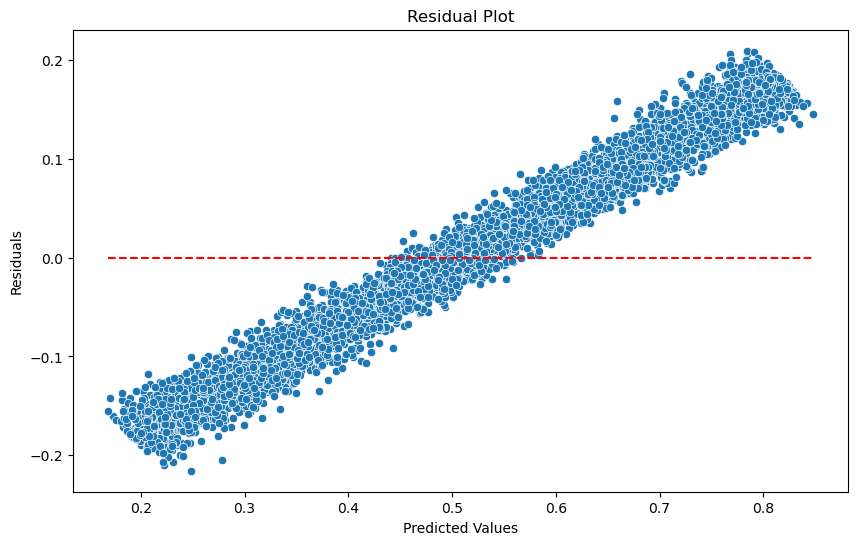

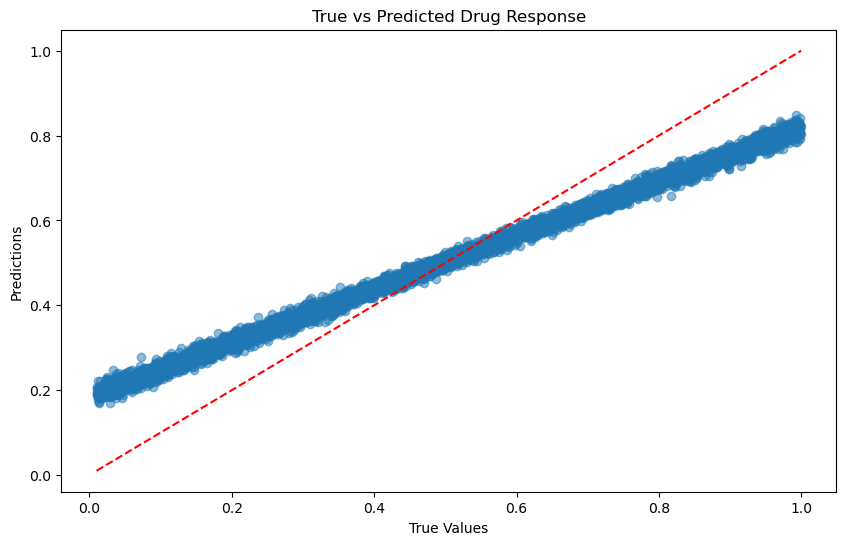

Testing Data Visualization:


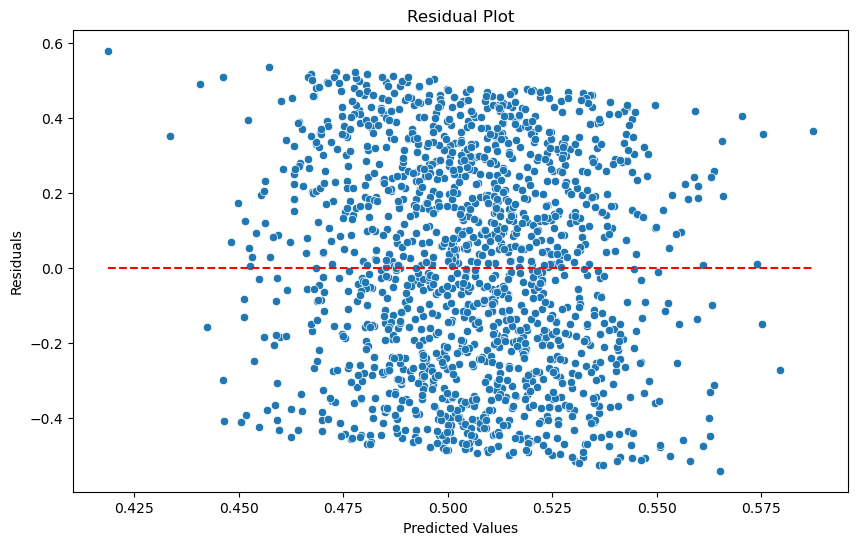

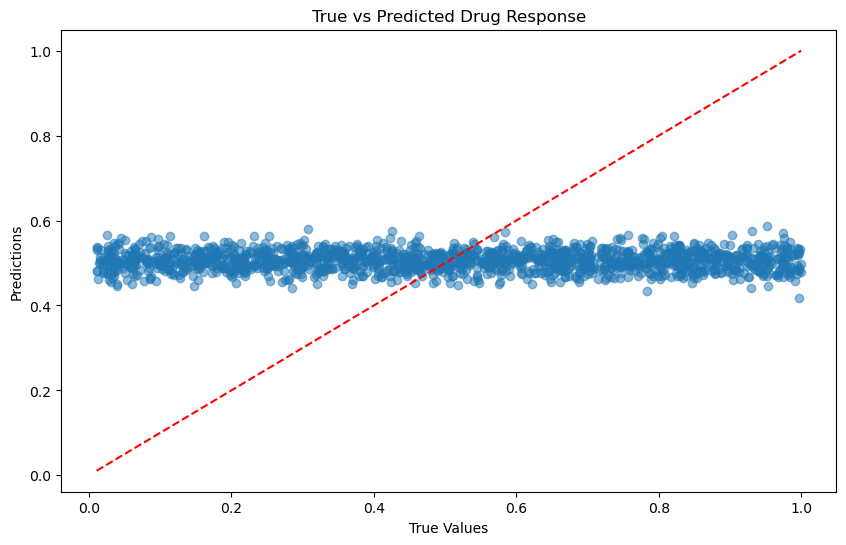

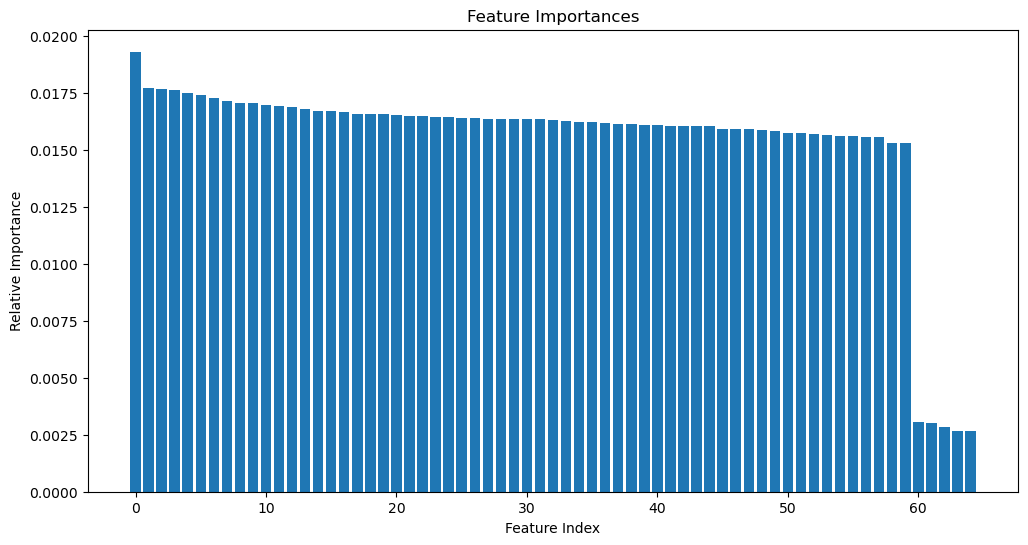

In [32]:
# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(np.array(y_train).flatten(), np.array(y_pred_train).flatten())
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xlabel('Feature Index')
plt.ylabel('Relative Importance')
plt.show()

Random Forest does better than Ridge regression, but overfits a lot.

In [29]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(np.array(y_train).flatten(), y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(np.array(y_test).flatten(), y_pred_test, tolerance=0.1)

c:\Users\alice\anaconda3\envs\c142\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Training Data Evaluation:
Mean Squared Error: 0.7558064901288426
R-squared: 0.2425633322685915
Accuracy (within tolerance 0.1): 6.66%
Testing Data Evaluation:
Mean Squared Error: 1.0121254429260222
R-squared: -0.0036172047126972195
Accuracy (within tolerance 0.1): 5.17%


# Neural Networks

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

def timeit(f):
    def timed(*args, **kw):
        ts = time.time()
        result = f(*args, **kw)
        te = time.time()
        print(f'func: {f.__name__} took: {te-ts:.4f} sec')
        return result
    return timed

class ColCanDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class Trainer:
    def __init__(self, model, opt_method, learning_rate, batch_size, epoch, l2):
        self.model = model
        if opt_method == "sgdm":
            self.optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
        elif opt_method == "adam":
            self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2)
        else:
            raise NotImplementedError("This optimization is not supported")

        self.epoch = epoch
        self.batch_size = batch_size

    @timeit
    def train(self, train_data, val_data, early_stop=True, verbose=True, draw_curve=True):
        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)

        train_loss_list, train_mse_list = [], []
        val_loss_list, val_mse_list = [], []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        loss_func = nn.MSELoss()

        patience = 10
        counter = 0
        
        for n in tqdm(range(self.epoch), leave=False):
            self.model.train()
            for X_batch, y_batch in train_loader:
                y_pred = self.model(X_batch)

                y_batch = y_batch.squeeze()
                batch_loss = loss_func(y_pred.squeeze(), y_batch)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()

            train_loss, train_mse, _, _ = self.evaluate(train_data, loss_func)
            train_loss_list.append(train_loss)
            train_mse_list.append(train_mse)

            val_loss, val_mse, _, _ = self.evaluate(val_data, loss_func)
            val_loss_list.append(val_loss)
            val_mse_list.append(val_mse)

            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    weights = self.model.state_dict()
                    counter = 0
                else:
                    counter += 1
                    if counter >= patience:
                        print(f"Early stopping at epoch {n}")
                        break

        if draw_curve:
            self.plot_learning_curves(train_loss_list, val_loss_list, train_mse_list, val_mse_list)

        if early_stop:
            self.model.load_state_dict(weights)

        return {
            "train_loss_list": train_loss_list,
            "train_mse_list": train_mse_list,
            "val_loss_list": val_loss_list,
            "val_mse_list": val_mse_list,
        }

    def evaluate(self, data, loss_func):
        self.model.eval()
        loader = DataLoader(data, batch_size=self.batch_size, shuffle=False)
        mse, loss = 0.0, 0.0
        all_preds, all_trues = [], []
        for X_batch, y_batch in loader:
            with torch.no_grad():
                batch_importance = y_batch.shape[0] / len(data)
                y_pred = self.model(X_batch)

                batch_loss = loss_func(y_pred.squeeze(), y_batch)
                batch_mse = torch.mean((y_pred.squeeze() - y_batch) ** 2)
                loss += batch_loss.item() * batch_importance
                mse += batch_mse.item() * batch_importance

                all_preds.extend(y_pred.squeeze().cpu().numpy())
                all_trues.extend(y_batch.cpu().numpy())

        # Convert lists to numpy arrays for easier manipulation
        all_preds = np.array(all_preds)
        all_trues = np.array(all_trues)

        return loss, mse, all_preds, all_trues

    def plot_learning_curves(self, train_loss, val_loss, train_mse, val_mse):
        x_axis = np.arange(len(train_loss))
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        axes[0].plot(x_axis, train_loss, label="Train")
        axes[0].plot(x_axis, val_loss, label="Validation")
        axes[0].set_title("Loss")
        axes[0].legend()
        axes[1].plot(x_axis, train_mse, label='Train')
        axes[1].plot(x_axis, val_mse, label='Validation')
        axes[1].set_title("MSE")
        axes[1].legend()
        plt.show()

def plot_residuals(y_true, y_pred):
    # Ensure y_true is a 1D array
    y_true = y_true.flatten()

    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

def plot_predictions(y_true, y_pred): 
    # Ensure y_true is a 1D array
    y_true = y_true.flatten() 

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title('Prediction vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def KFoldCrossValidation(
    model_class, k,
    X_train, y_train, X_test, y_test,
    opt_method='adam', learning_rate=2e-3, batch_size=128, epoch=50, l2=0.0,
    early_break=False,
    **model_args
):
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    test_data = ColCanDataset(X_test, y_test)
    kf = KFold(n_splits=k, shuffle=True)
    train_mse_list, test_mse_list = [], []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {i}:")

        train_data = ColCanDataset(X_train[train_index], y_train[train_index])
        val_data = ColCanDataset(X_train[val_index], y_train[val_index])

        model = model_class(**model_args)

        trainer = Trainer(model, opt_method, learning_rate, batch_size, epoch, l2)
        res = trainer.train(train_data, val_data)
        train_mse_best = res['train_mse_list'][np.argmin(res['val_loss_list'])]

        # Pass the loss function to evaluate
        loss_func = nn.MSELoss()
        test_loss, test_mse, y_pred, y_true = trainer.evaluate(test_data, loss_func)

        train_mse_list.append(train_mse_best)
        test_mse_list.append(test_mse)

        print(f"Training MSE: {train_mse_best}")
        print(f"Test MSE: {test_mse}")

        # Plot residuals and predictions at the end of each fold
        plot_residuals(y_true, y_pred)
        plot_predictions(y_true, y_pred)
        
        if early_break:
            break

        
    if not early_break:
        print("Final results:")
        print(f"Training MSE: {np.mean(train_mse_list)}+/-{np.std(train_mse_list)}")
        print(f"Test MSE: {np.mean(test_mse_list)}+/-{np.std(test_mse_list)}")


In [43]:
# Convert and reshape the data to be compatible with PyTorch CNN

def convert_to_tensor(data):
    if not isinstance(data, torch.Tensor):
        return torch.tensor(data.values, dtype=torch.float)
    return data

# Convert data to PyTorch tensors if not already converted
X_train = convert_to_tensor(X_train)
X_test = convert_to_tensor(X_test)
y_train = convert_to_tensor(y_train)
y_test = convert_to_tensor(y_test)


## NN

### Simple MLP

In [44]:
class MLP(nn.Module):
    def __init__(self, input_dim=65):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        out = self.net(x)
        return out #.view(-1, 1)  # ensure shape is [batch_size, 1]

torch.Size([6114, 65]) torch.Size([6114, 1])
torch.Size([1529, 65]) torch.Size([1529, 1])
Fold 0:


  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([108, 1])) that is different to the input size (torch.Size([108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([118, 1])) that is different to the input size (torch.Size([118])). This will likely lead to incorrect results due to broadcasting. Please ensure they h

Early stopping at epoch 10


ValueError: x and y must have same first dimension, but have shapes (1000,) and (11,)

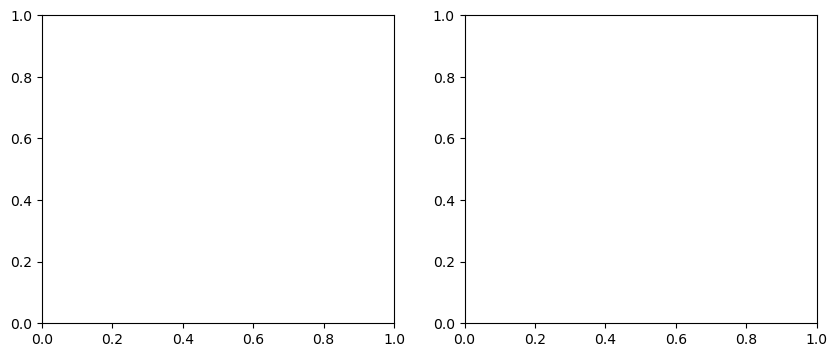

In [45]:
# Try this simple NN MLP model with KFold cross-validation
k=3
model_class= MLP
KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-3, batch_size=128, epoch=1000, early_break=True)

In [24]:
from torchsummary import summary

class DeepNN(nn.Module):
    def __init__(self, input_dim=5):
        super(DeepNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),  # Optional: Add dropout for regularization

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),  # Optional: Add dropout for regularization

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),  # Optional: Add dropout for regularization

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),  # Optional: Add dropout for regularization

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

summary(DeepNN(), (5,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           1,536
              ReLU-2                  [-1, 256]               0
           Dropout-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 64]           8,256
              ReLU-8                   [-1, 64]               0
           Dropout-9                   [-1, 64]               0
           Linear-10                   [-1, 32]           2,080
             ReLU-11                   [-1, 32]               0
          Dropout-12                   [-1, 32]               0
           Linear-13                    [-1, 1]              33
Total params: 44,801
Trainable params: 

In [34]:
# Try this Deep NN model with KFold cross-validation
k=3
model_class=DeepNN
KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-3, batch_size=128, epoch=100, early_break=True)

torch.Size([6114, 65]) torch.Size([6114, 1])
torch.Size([1529, 65]) torch.Size([1529, 1])
Fold 0:


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x65 and 5x256)

## CNN

In [ ]:
# Reshape the data to be compatible with PyTorch CNN

def reshape_input(X, y):
    """
    Reshape input X to shape [N, 1, 8, 8] from first 65 (converted to 64) features.
    y stays as [N, 1].
    """
    X_reshaped = X[:, :64].reshape(-1, 1, 8, 8)
    return X_reshaped, y

# Reshape into CNN-compatible format
X_train, y_train = reshape_input(X_train, y_train)
X_test, y_test = reshape_input(X_test, y_test)

### Shallow CNN

In [14]:
# Define a simple CNN model first

class ShallowCNN(nn.Module):
    def __init__(self, in_channels=1):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels=3, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(3 *8 *8, 1)  # Adjust output size to 1 for regression

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

torch.Size([6114, 1, 8, 8]) torch.Size([6114, 1])
torch.Size([1529, 1, 8, 8]) torch.Size([1529, 1])
Fold 0:


  0%|          | 0/30 [00:00<?, ?it/s]

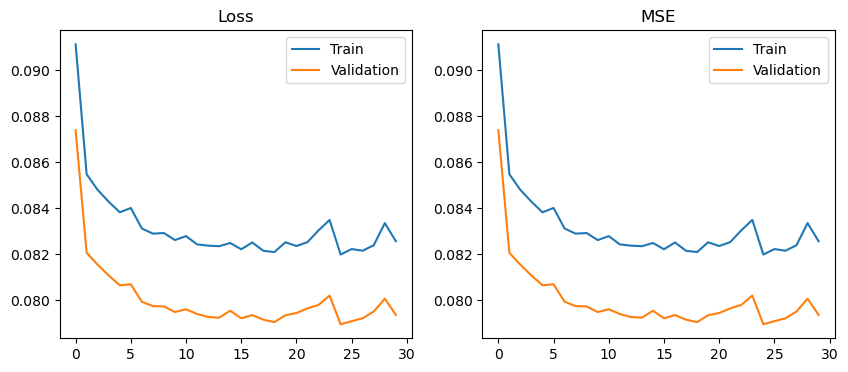

func: train took: 9.2670 sec
Training MSE: 0.08197549201175205
Test MSE: 0.08255014142193305


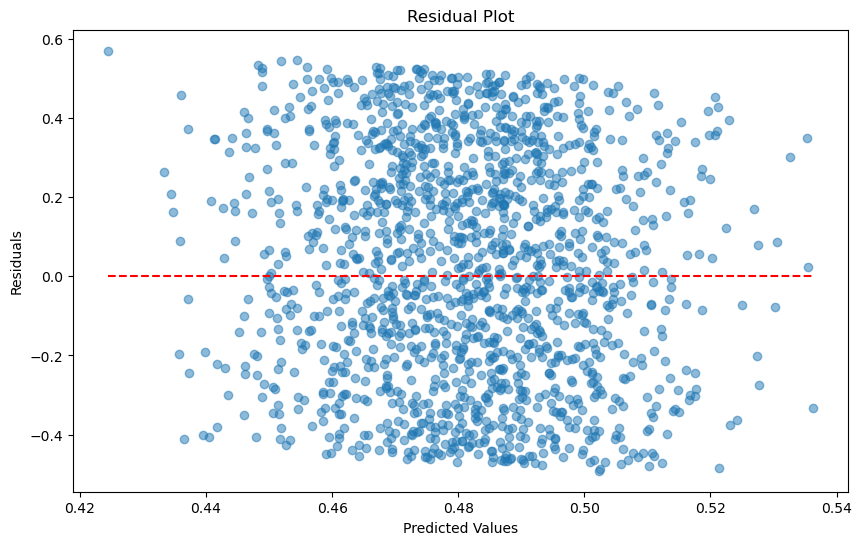

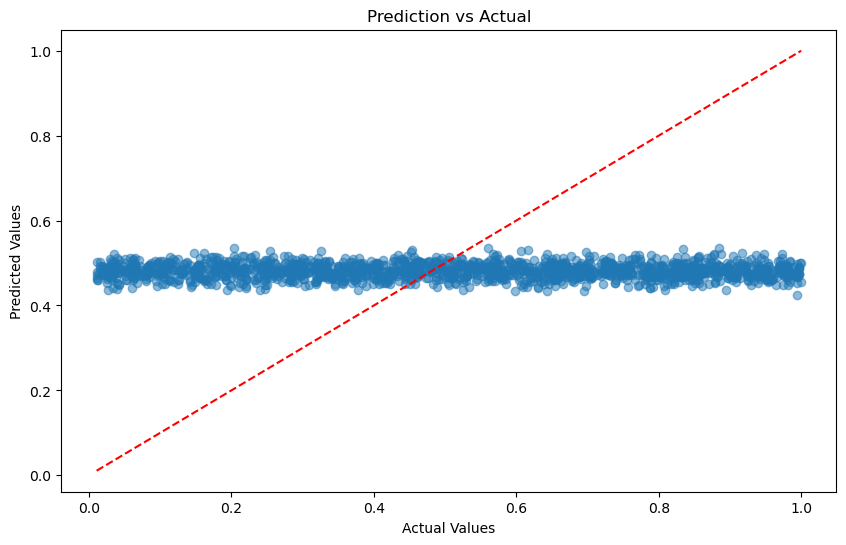

Fold 1:


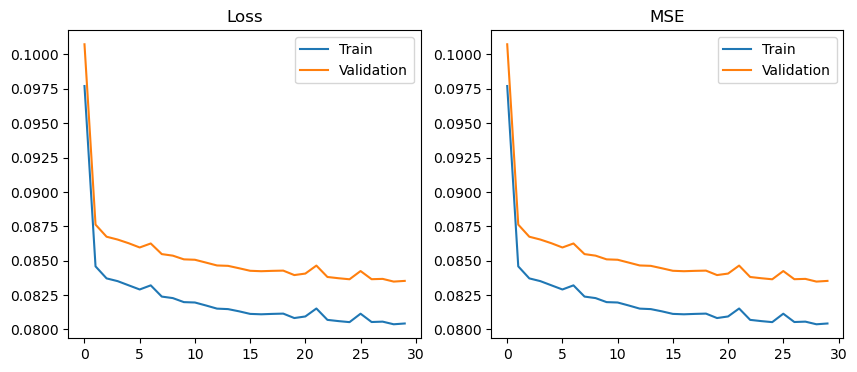

func: train took: 9.3662 sec
Training MSE: 0.08037698271815046
Test MSE: 0.08242929477836668


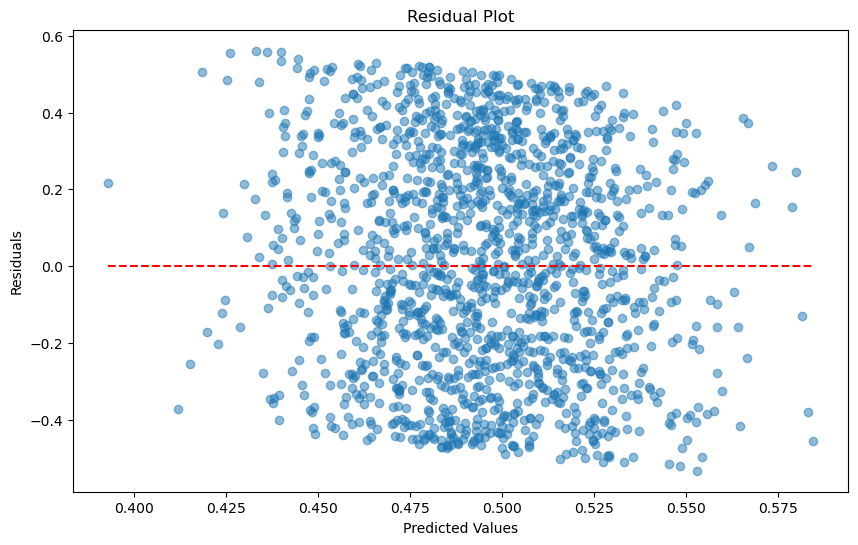

KeyboardInterrupt: 

In [15]:
# Try this ShallowCNN model with KFold cross-validation
k=3
model_class=ShallowCNN
KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-3, batch_size=128, epoch=30)

### Deep CNN

In [5]:
from torchsummary import summary


# Build a more complex CNN model
class DeepCNN(nn.Module):
    def __init__(self, in_channels=1):
        super(DeepCNN, self).__init__()
        self.layers= nn.Sequential(
            nn.Conv2d(in_channels, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.Flatten(),
            nn.Linear(32*3*3, 128),
            nn.ReLU(),
            #nn.Dropout(0.7),
            nn.Linear(128, 1)
            )

    def forward(self, x):
        return self.layers(x)
    
summary(DeepCNN(), (1, 8, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 16, 8, 8]             416
              ReLU-2             [-1, 16, 8, 8]               0
         MaxPool2d-3             [-1, 16, 4, 4]               0
            Conv2d-4             [-1, 32, 4, 4]           4,640
              ReLU-5             [-1, 32, 4, 4]               0
         MaxPool2d-6             [-1, 32, 3, 3]               0
           Flatten-7                  [-1, 288]               0
            Linear-8                  [-1, 128]          36,992
              ReLU-9                  [-1, 128]               0
           Linear-10                    [-1, 1]             129
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.16
Estimated Tot

torch.Size([6114, 1, 8, 8]) torch.Size([6114, 1])
torch.Size([1529, 1, 8, 8]) torch.Size([1529, 1])
Fold 0:


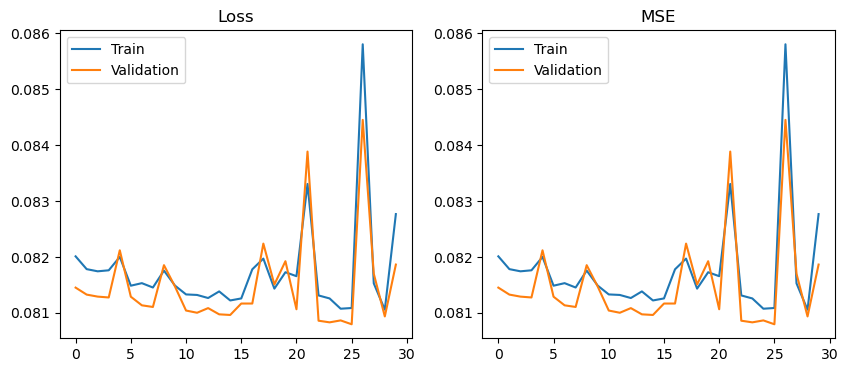

func: train took: 42.3742 sec
Training MSE: 0.08108744647635385
Test MSE: 0.08311134321947672


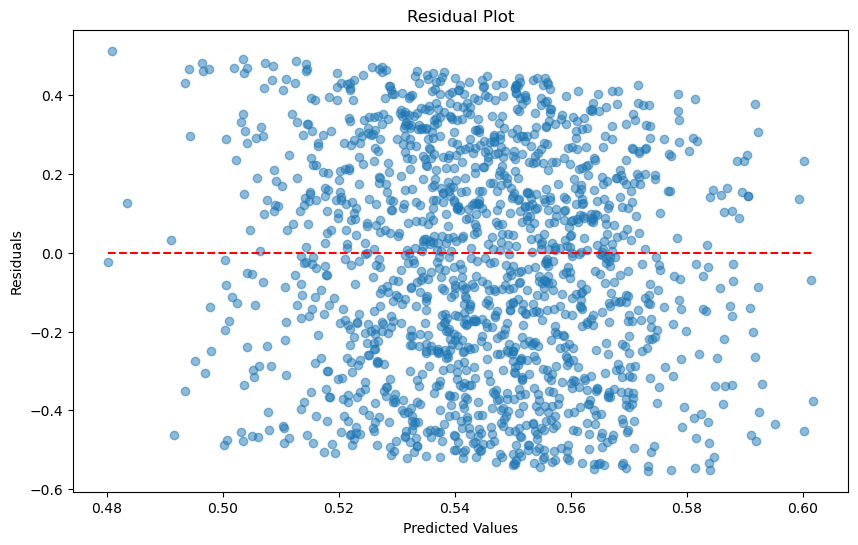

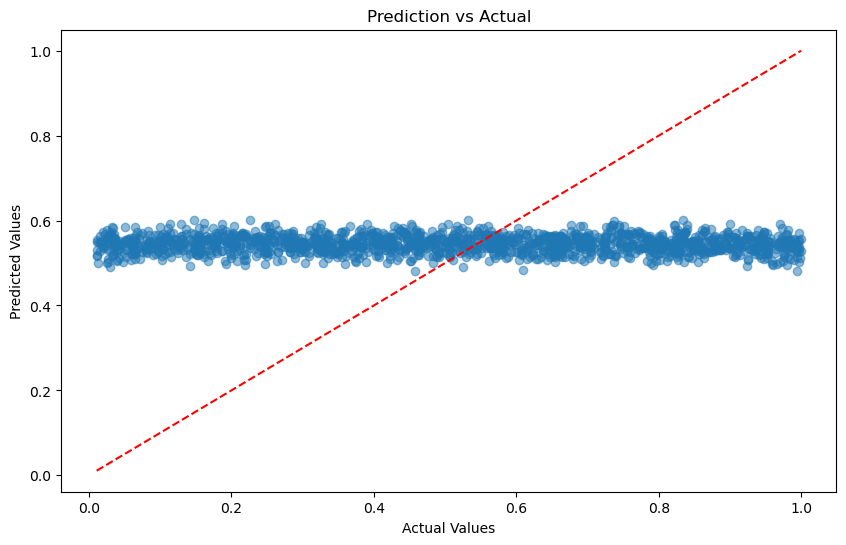

Fold 1:


KeyboardInterrupt: 

In [13]:
# Try this CNN model with KFold cross-validation
k=3
model_class=DeepCNN
KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-4, batch_size=30, epoch=30, l2=1e-5)